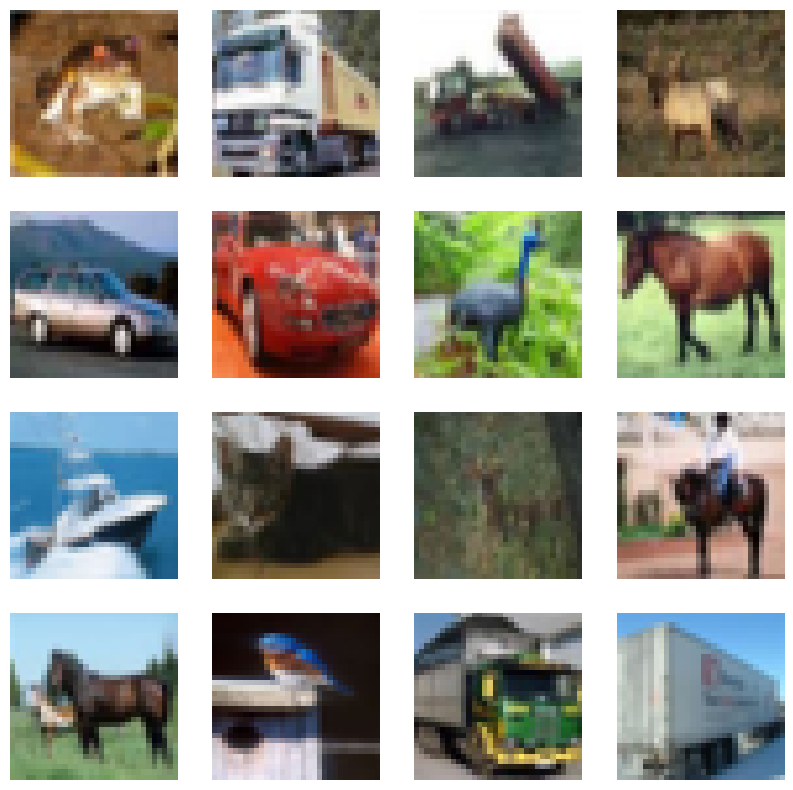

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.show()

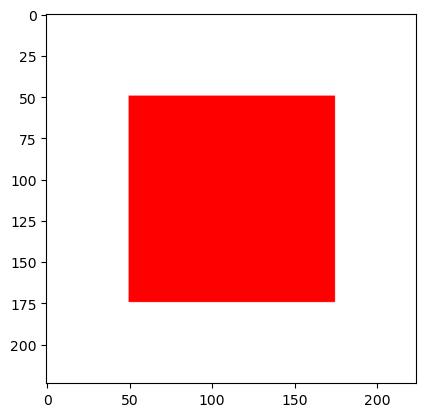

In [3]:
from PIL import Image, ImageDraw
image = Image.new('RGB', (224, 224), color = (255, 255, 255))
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill = (255, 0, 0))
plt.imshow(image)
image.save('sample.jpg')

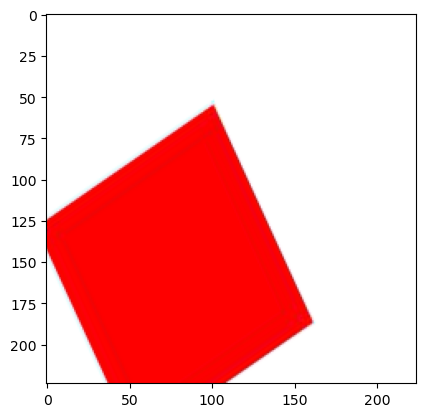

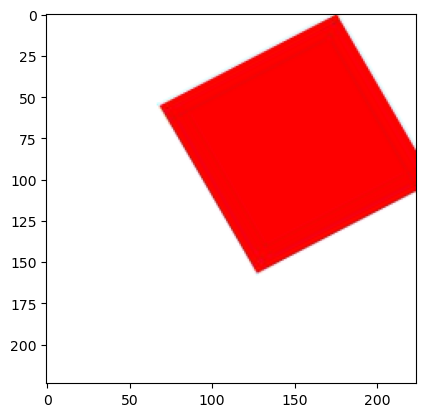

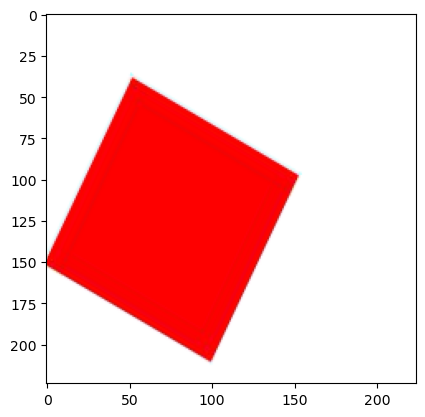

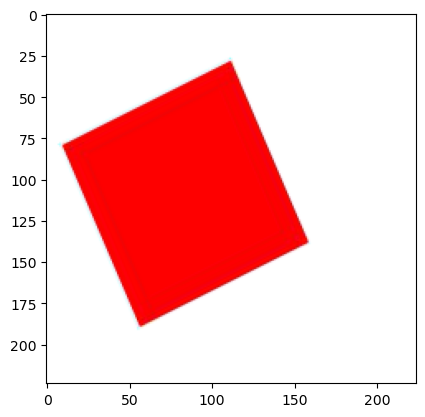

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
x.shape

(1, 224, 224, 3)

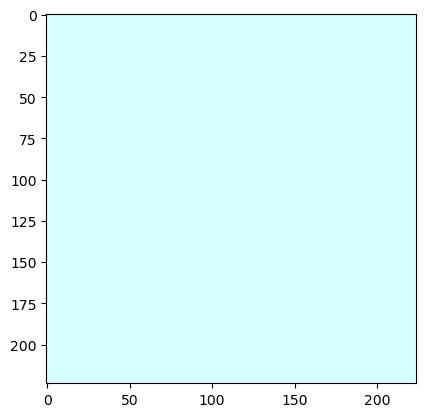

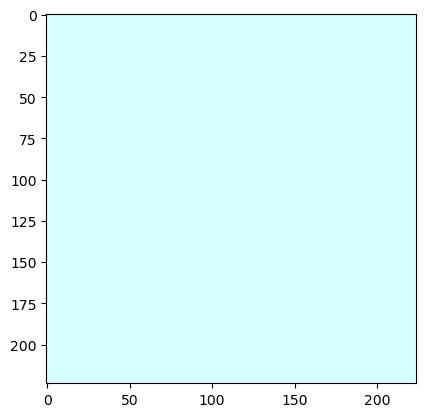

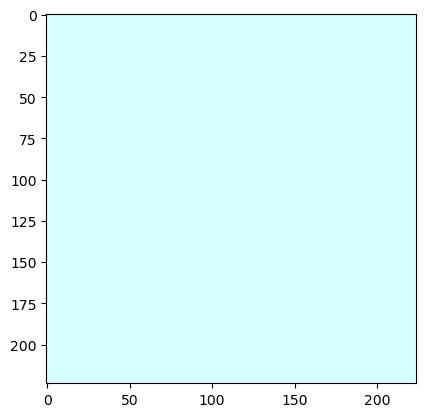

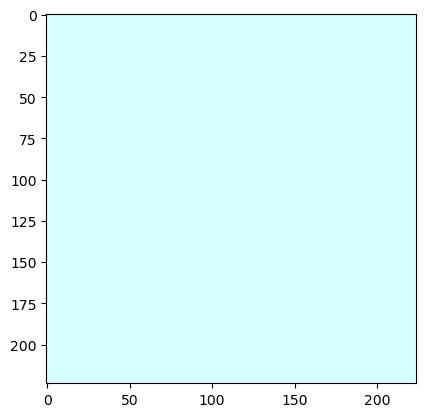

In [7]:
datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    samplewise_center = True,
    samplewise_std_normalization = True
)
datagen.fit(x)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

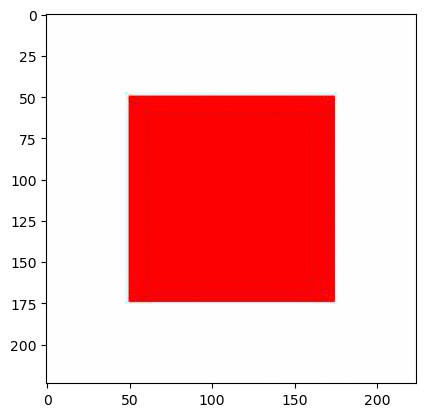

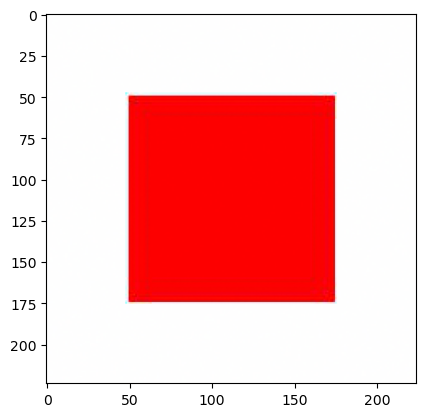

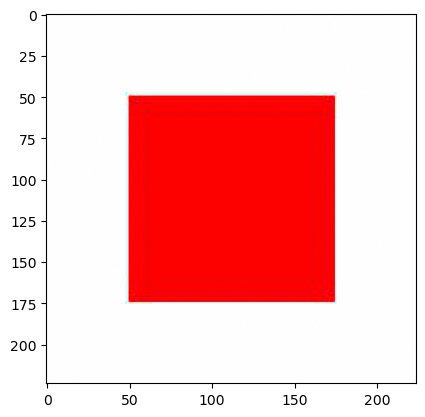

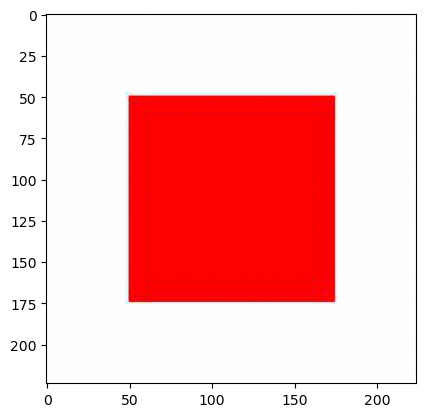

In [9]:
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

datagen = ImageDataGenerator(preprocessing_function = add_random_noise)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

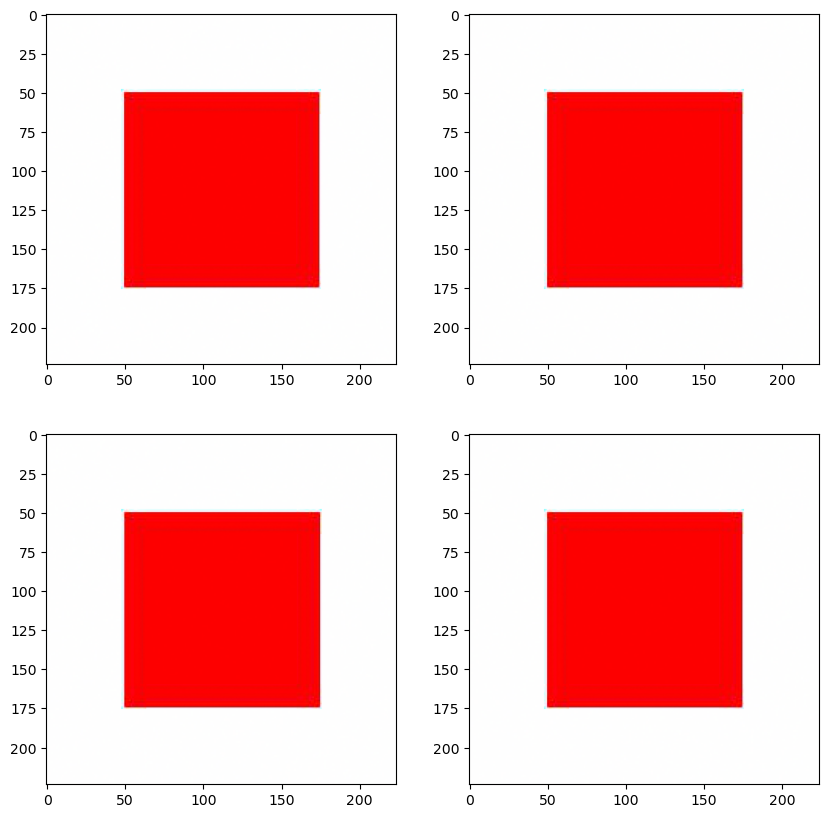

In [10]:
plt.figure(figsize = (10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size = 1)):
    if i >= 4:
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()